In [1]:
# Loading the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [3]:
# reading the data
train_df = pd.read_csv("train.csv")
#test_df = pd.read_csv("test.csv")
train_df.sample(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
91,92,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0274497,it,Le fate ignoranti,When Antonia's husband Massimo is killed in a ...,3.831960,...,3/16/01,106.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,NaN,His Secret Life,"[{'id': 740, 'name': 'aids'}, {'id': 10198, 'n...","[{'cast_id': 19, 'character': 'Antonia', 'cred...","[{'credit_id': '52fe446dc3a368484e02273f', 'de...",215339
1751,1752,NaN,17820000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0357111,fr,RRRrrrr!!!,"37 000 years ago, two neighboring tribes lived...",9.482248,...,1/28/04,94.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,RRRrrrr!!!,NaN,"[{'cast_id': 2, 'character': 'Guy', 'credit_id...","[{'credit_id': '52fe4427c3a368484e012799', 'de...",14054361
2939,2940,NaN,9500000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.trustmovie2011.com/,tt1529572,en,Trust,A suburban family is torn apart when fourteen-...,7.778097,...,9/10/10,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"What took her family years to build, a strange...",Trust,"[{'id': 570, 'name': 'rape'}, {'id': 1523, 'na...","[{'cast_id': 32, 'character': 'William ""Will"" ...","[{'credit_id': '56178ea59251412ae5002167', 'de...",120000
456,457,NaN,1288000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0032976,en,Rebecca,A self-conscious bride is tormented by the mem...,8.590813,...,4/12/40,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The shadow of this woman darkened their love.,Rebecca,"[{'id': 660, 'name': 'monte carlo'}, {'id': 81...","[{'cast_id': 10, 'character': ""'Maxim' de Wint...","[{'credit_id': '52fe4228c3a36847f8008885', 'de...",6000000
1824,1825,NaN,19000000,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",NaN,tt0058085,en,The Fall of the Roman Empire,Drawn from the same events that later inspired...,2.824367,...,3/24/64,188.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Most Magnificent Re-Creation . . . Of An A...,The Fall of the Roman Empire,"[{'id': 1405, 'name': 'roman empire'}, {'id': ...","[{'cast_id': 1, 'character': 'Lucilla', 'credi...","[{'credit_id': '59ce565d9251416c82017b53', 'de...",4750000


In [4]:
# Looking at the NA values in the dataset
train_df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [5]:
# data dimensions
train_df.shape

(3000, 23)

In [6]:
# Correlation of predictors with the Y variable
train_df.corr()["revenue"]

id            0.000610
budget        0.752965
popularity    0.461460
runtime       0.216380
revenue       1.000000
Name: revenue, dtype: float64

# 1. Budget

In [7]:
# Looking at the top 10 rows of budgets
train_df.budget[:10]

0    14000000
1    40000000
2     3300000
3     1200000
4           0
5     8000000
6    14000000
7           0
8           0
9     6000000
Name: budget, dtype: int64

In [8]:
# imputing the 0 value with median
train_df.budget = train_df.budget.replace(0,train_df.budget.median())

train_df.budget[:10]

0    14000000
1    40000000
2     3300000
3     1200000
4     8000000
5     8000000
6    14000000
7     8000000
8     8000000
9     6000000
Name: budget, dtype: int64

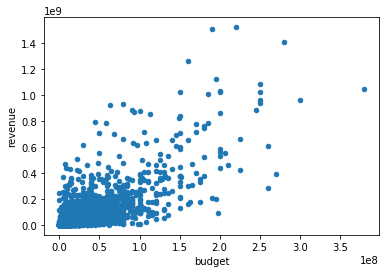

In [9]:
# Plot showing the relationship between revenue and budget
train_df.plot.scatter(x = "budget", y = "revenue")

# 2. Generes

In [10]:
# Top 10 rows of genere
train_df.genres[0:10]

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
5    [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
6    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
7                  [{'id': 99, 'name': 'Documentary'}]
8    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
9    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
Name: genres, dtype: object

In [11]:
# Function to covert text into python readable code
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d


In [12]:
# counting the number of genres in each movies
train_df['genres_count'] = train_df['genres'].apply(lambda x: len([d['name'] for d in get_dictionary(x)]))#.apply(lambda x: ','.join(x))

train_df.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_count
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,4
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2
4,5,NaN,8000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2


In [13]:
set(train_df.genres_count)

{0, 1, 2, 3, 4, 5, 6, 7}

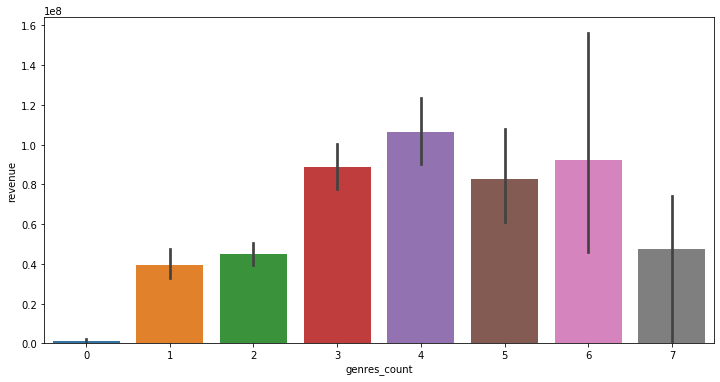

In [14]:
#Ploting the graph showing relationship between genres count and revenue
fig, saxis = plt.subplots(1,1 ,figsize=(12,6))

sns.barplot(x = 'genres_count', y = 'revenue', data=train_df)

# 3. Title

In [15]:
# top 10 rows 
train_df.title[:10]

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                  Marine Boy
5      Pinocchio and the Emperor of the Night
6                              The Possession
7                                Control Room
8                      Muppet Treasure Island
9                               A Mighty Wind
Name: title, dtype: object

In [16]:
# getting the lenght of the string title
train_df['title_len'] = train_df.title.apply(lambda x: len(x) )

train_df.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_count,title_len
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,22
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,4,40
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,8
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2,7
4,5,NaN,8000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,10


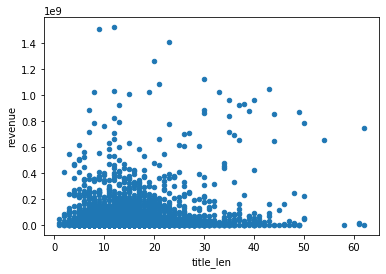

In [17]:
# plotting the relationship between the title lenght and revenue
train_df.plot.scatter(x="title_len", y = "revenue")

# 4. Release Date

In [18]:
# top 10 rows
train_df.release_date[:10]

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
5      8/6/87
6     8/30/12
7     1/15/04
8     2/16/96
9     4/16/03
Name: release_date, dtype: object

In [19]:
# extracting years from release date
train_df["Year"] = train_df.release_date.apply(lambda x: int(x.split('/')[2]))

#coverting years into 4 digit integer
train_df.loc[((train_df["Year"] <=19) & (train_df["Year"] <100)), "Year"] += 2000
train_df.loc[((train_df["Year"] >19) & (train_df["Year"] <100)), "Year"] += 1900

train_df.sample(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,genres_count,title_len,Year
1923,1924,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10769, '...",NaN,tt0460892,en,OPA!,A modern day treasure hunt for a mystical reli...,1.218763,...,Released,The Island ... The Treasure ... The Romance,OPA!,NaN,"[{'cast_id': 2, 'character': 'Eric', 'credit_i...","[{'credit_id': '52fe496dc3a36847f8199ad3', 'de...",6000000,3,4,2005
2348,2349,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0093073,en,Gardens of Stone,A sergeant must deal with his desires to save ...,2.787833,...,Released,"The story of the war at home, and the people w...",Gardens of Stone,"[{'id': 422, 'name': 'vietnam veteran'}, {'id'...","[{'cast_id': 1, 'character': 'Sgt. Clell Hazar...","[{'credit_id': '52fe4590c3a368484e06276b', 'de...",5262047,2,16,1987
2731,2732,"[{'id': 4246, 'name': 'Scary Movie Collection'...",19000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0175142,en,Scary Movie,Following on the heels of popular teen-scream ...,12.446738,...,Released,No mercy. No shame. No sequel.,Scary Movie,"[{'id': 572, 'name': 'sex'}, {'id': 2101, 'nam...","[{'cast_id': 23, 'character': 'Drew Decker', '...","[{'credit_id': '52fe43b5c3a36847f806975d', 'de...",278019771,1,11,2000
1503,1504,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0092717,en,Campus Man,Todd Barret is an aspiring businessman. He's g...,0.000844,...,Released,"All the girls want to take Brett Wilson home, ...",Campus Man,NaN,"[{'cast_id': 7, 'character': 'Todd Barrett', '...","[{'credit_id': '59e1573292514172bb005191', 'de...",989000,1,10,1987
431,432,"[{'id': 52749, 'name': 'The Butterfly Effect C...",13000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,tt0289879,en,The Butterfly Effect,A young man struggles to access sublimated chi...,12.994939,...,Released,"Such minor changes, such huge consequences.",The Butterfly Effect,"[{'id': 1453, 'name': 'amnesia'}, {'id': 2362,...","[{'cast_id': 21, 'character': 'Evan Treborn', ...","[{'credit_id': '52fe4325c3a36847f803de7b', 'de...",96060858,2,20,2004


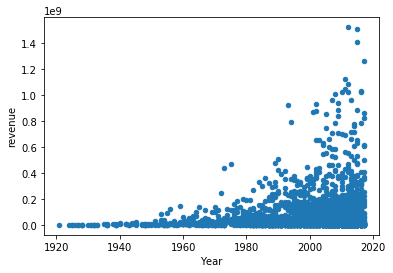

In [20]:
#Plotting the relationship between the years and revenue
train_df.plot.scatter(x="Year", y = "revenue")

# 5. Runtime

In [21]:
# top 10 rows
train_df.runtime[:10]

0     93.0
1    113.0
2    105.0
3    122.0
4    118.0
5     83.0
6     92.0
7     84.0
8    100.0
9     91.0
Name: runtime, dtype: float64

In [22]:
# imputing the NA values with mean
train_df.runtime = train_df.runtime.fillna(train_df.runtime.mean())

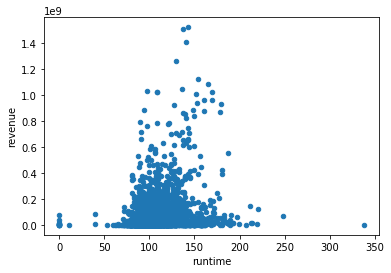

In [23]:
# plotting the relationship between the runtime and revenue
train_df.plot.scatter(x="runtime", y = "revenue")

# 6. Tagline

In [24]:
# top 10 rows
train_df.tagline[:10]

0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                 Fear The Demon That Doesn't Fear God
7                Different channels. Different truths.
8                          Set sail for Muppet mayhem!
9             Back together for the first time, again.
Name: tagline, dtype: object

In [25]:
# creating a indicator variables showing whether there is a tagline or not
train_df['tagline_boolean'] = train_df.tagline.notnull()

In [26]:
set(train_df['tagline_boolean'])

{False, True}

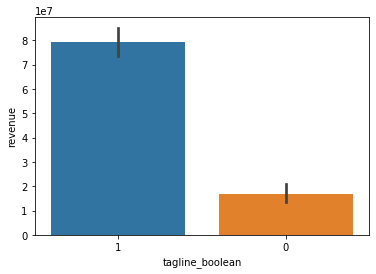

In [27]:
# plotting the tagline boolean with respect to revenue
sns.barplot(x = 'tagline_boolean', y = 'revenue', order=[1,0], data=train_df)

# 7. Production Companies

In [28]:
# top 10 rows
train_df.production_companies[:10]

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
5                                                  NaN
6    [{'name': 'Ghost House Pictures', 'id': 768}, ...
7                                                  NaN
8    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
9    [{'name': 'Castle Rock Entertainment', 'id': 97}]
Name: production_companies, dtype: object

In [29]:
# extracting the number of production companies which produce a movie
train_df["companies_number"] = train_df.production_companies.apply(lambda x: len([d['name'] for d in get_dictionary(x)]))#.apply(lambda x: ','.join(x))

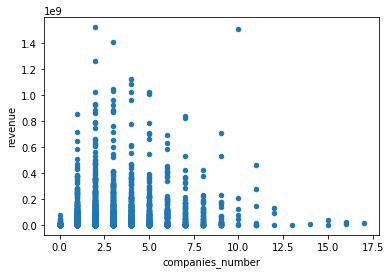

In [30]:
# plotting the relationship between the number of production companies and the revenue
train_df.plot.scatter(x = "companies_number", y="revenue")

# 8. Cast

In [31]:
#top 10 rows
train_df.cast[:10]

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
5    [{'cast_id': 6, 'character': 'Pinocchio (voice...
6    [{'cast_id': 23, 'character': 'Clyde', 'credit...
7    [{'cast_id': 2, 'character': 'Himself', 'credi...
8    [{'cast_id': 1, 'character': 'Long John Silver...
9    [{'cast_id': 24, 'character': 'Jonathan Steinb...
Name: cast, dtype: object

In [32]:
# extracting the cast size for each movie
train_df["cast_size"] = train_df.cast.apply(lambda x: len([d['name'] for d in get_dictionary(x)]))

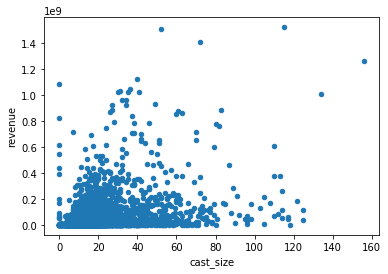

In [33]:
# plotting the relationship betweent the cast size and revenue
train_df.plot.scatter(x = "cast_size", y="revenue")

In [34]:
# Extracting the names of all cast member from dictionary
train_df["main_cast"] = train_df.cast.apply(lambda x: ([d['name'] for d in get_dictionary(x)])).apply(lambda x: x[0] if len(x)>1 else x)#lambda x: ','.join(x))#

In [35]:
# creating a column for each cast member
X = train_df["main_cast"].str.get_dummies(sep=',')

In [36]:
X.head()

,50 Cent,Aamir Khan,Aaron Eckhart,Aaron Stanford,Aaron Swartz,Aaron Taylor-Johnson,Abigail Breslin,Ad van Kempen,Adam Beach,Adam Sandler,...,['Samuel L. Jackson'],['Sergei Astahov'],['Spalding Gray'],['Subcommandante Marcos'],['Tom Waits'],['Vik Muniz'],['Will Allen'],[],√âric Bruneau,≈ûahan G√∂kbakar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# sorting the cast member on the basis of the frequency in descending order
s= X.sum().sort_values(ascending=False)
X = X.ix[:,s.index]


C:\Users\karan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# Selecting the 15 most common cast members and adding them to the train set data
train_df = pd.concat([train_df,X.iloc[:,:15]], axis = 1)
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Robert De Niro,George Clooney,Mark Wahlberg,Owen Wilson,Bruce Willis,Tom Hanks,Arnold Schwarzenegger,Matt Damon,Johnny Depp,Eddie Murphy
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,0,0,0,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,8000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,0,0,0


# 9. Belongs To Collection

In [39]:
# top 10 rows
train_df.belongs_to_collection[:10]

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                                                  NaN
7                                                  NaN
8    [{'id': 256377, 'name': 'The Muppet Collection...
9                                                  NaN
Name: belongs_to_collection, dtype: object

In [40]:
# Creating an indicator variable showing whether a movie belongs to a collection or not
train_df["boolean_collection"]= train_df.belongs_to_collection.notnull()

In [41]:
set(train_df['boolean_collection'])

{False, True}

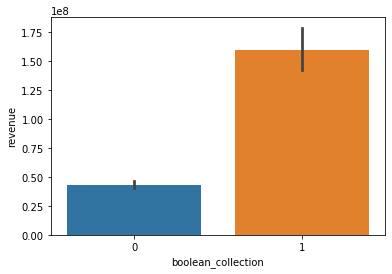

In [42]:
# plotting the boolean_collection variable with revenue
sns.barplot(x = 'boolean_collection', y = 'revenue', order=[0,1], data=train_df)

# Popularity

In [43]:
# top 10 rows
train_df.popularity[:10]

0     6.575393
1     8.248895
2    64.299990
3     3.174936
4     1.148070
5     0.743274
6     7.286477
7     1.949044
8     6.902423
9     4.672036
Name: popularity, dtype: float64

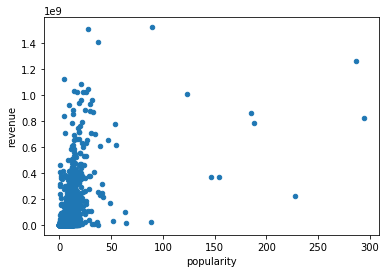

In [44]:
# plot showing the relationship between the popularity and revenue
train_df.plot.scatter(x = 'popularity', y = 'revenue')

# Preprocessing

In [45]:
# loading library
from sklearn.preprocessing import LabelEncoder

In [46]:
train_df.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,George Clooney,Mark Wahlberg,Owen Wilson,Bruce Willis,Tom Hanks,Arnold Schwarzenegger,Matt Damon,Johnny Depp,Eddie Murphy,boolean_collection
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,True
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,0,0,0,True
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,False
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,0,0,False
4,5,NaN,8000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,0,0,False


In [47]:
# Looking at all the column names
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'genres_count', 'title_len', 'Year', 'tagline_boolean',
       'companies_number', 'cast_size', 'main_cast', '[]', 'Denzel Washington',
       'Sylvester Stallone', 'Nicolas Cage', 'Mel Gibson', 'Robert De Niro',
       'George Clooney', 'Mark Wahlberg', 'Owen Wilson', 'Bruce Willis',
       'Tom Hanks', 'Arnold Schwarzenegger', 'Matt Damon', 'Johnny Depp',
       'Eddie Murphy', 'boolean_collection'],
      dtype='object')

In [48]:
# checking the correlation of columns with respect to revenue
train_df.corr()["revenue"]

id                       0.000610
budget                   0.753490
popularity               0.461460
runtime                  0.216363
revenue                  1.000000
genres_count             0.163654
title_len                0.109664
Year                     0.137933
tagline_boolean          0.180366
companies_number         0.155700
cast_size                0.335737
[]                       0.073832
Denzel Washington        0.013381
Sylvester Stallone       0.040483
Nicolas Cage             0.019081
Mel Gibson               0.020983
Robert De Niro          -0.008650
George Clooney           0.030652
Mark Wahlberg            0.053087
Owen Wilson              0.048051
Bruce Willis            -0.002567
Tom Hanks                0.061249
Arnold Schwarzenegger    0.036451
Matt Damon               0.044305
Johnny Depp              0.089337
Eddie Murphy             0.023704
boolean_collection       0.339425
Name: revenue, dtype: float64

In [49]:
# subsetting the columns for the model
Selcol = ['budget', 'boolean_collection','companies_number', 'original_language', 'runtime', 'title_len', 'genres_count', 'tagline_boolean', 'Year', 'popularity','cast_size', '[]', 'Denzel Washington',
       'Sylvester Stallone', 'Nicolas Cage', 'Mel Gibson', 'Robert De Niro',
       'George Clooney', 'Mark Wahlberg', 'Owen Wilson', 'Bruce Willis',
       'Tom Hanks', 'Arnold Schwarzenegger', 'Matt Damon', 'Johnny Depp',
       'Eddie Murphy']

In [50]:
# label encoder for variable which are not numeric
le = LabelEncoder()
obj_columns = [col for col in train_df[Selcol].select_dtypes(include = ['object'])]

In [51]:
# applying label encoder
for col in obj_columns:
    train_df[col] = le.fit_transform(train_df[col])


# Modelling

## Linear Regression

In [52]:
# loading library
from sklearn.linear_model import LinearRegression

In [53]:
# fitting a linear regression model
model = LinearRegression()
model = model.fit(train_df[Selcol], train_df["revenue"])
train_df['predicted_revenue'] = pd.DataFrame(model.predict(train_df[Selcol]))
train_df["error_square"] = (  train_df["revenue"] -   train_df['predicted_revenue'] )**2

In [54]:
# RMSE of the model
((train_df["error_square"].mean())**0.5)

80991662.21799092

In [55]:
# R-square of the model
from sklearn import metrics
metrics.r2_score(train_df["revenue"], train_df["predicted_revenue"])

0.6530907857645392

In [56]:
# model coefficients
model.coef_

array([ 2.45327684e+00,  5.36324077e+07, -2.85629629e+06,  1.34071610e+05,
        2.36183106e+05,  3.91109448e+05, -1.94992030e+06,  5.85114211e+05,
       -4.39637084e+04,  2.29911928e+06,  6.02461009e+05,  2.09986123e+07,
       -2.75671297e+07,  1.11860229e+07, -4.72261564e+07, -2.80503897e+06,
       -2.85901883e+07, -2.09479970e+07, -2.15582327e+07, -1.63774387e+07,
       -6.38965937e+07,  2.68971371e+07, -2.71842213e+07, -3.02137122e+07,
        3.65736207e+06, -7.58685221e+06])

In [57]:
# model intercept
model.intercept_

31976801.599887848

## Random Forest

In [58]:
# loading library
from sklearn.ensemble import RandomForestRegressor

In [73]:
# fitting random forest model and calculating its RMSE
model = RandomForestRegressor()
model_rf = model.fit(train_df[Selcol], train_df["revenue"])
train_df['predicted_revenue1'] = pd.DataFrame(model_rf.predict(train_df[Selcol]))
train_df["error_square1"] = (  train_df["revenue"] -   train_df['predicted_revenue1'] )**2
((train_df["error_square1"].mean())**0.5)

C:\Users\karan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


35490418.91471935

In [74]:
# R-square as per random forest
metrics.r2_score(train_df["revenue"], train_df["predicted_revenue1"])

0.9333872348339995